<a href="https://colab.research.google.com/github/jay1230101/periph_neuro/blob/main/Peripheral_Neuropathy_practice_20_05_2022_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries 

In [1]:
# importing libraries 
import pandas as pd 
import numpy as np 

In [2]:
#uploading dataset 
data = pd.read_csv('/content/sample_data/peripheral_neuropathy_19_03-2022.csv',encoding = "ISO-8859-1")
data.head(3)

,ID,Age,Sex,Weight,Height,BMI,Diet,Smoker,PY,Activity Level,...,Tg,S_A,MP-A,MP-CV,Me-CV,P-A,P-CV,S-CV,U-A,U-CV
0,1,60,2,95,NaN,NaN,8,1,0,4,...,139.0,3.0,0.0,0.0,0.0,4.3,46.0,36.0,9.0,63.0
1,2,56,2,NaN,NaN,NaN,7,1,0,4,...,116.0,32.0,7.0,53.0,51.0,5.4,42.0,47.0,18.0,54.0
2,3,59,2,NaN,NaN,NaN,7,3,35,4,...,NaN,28.0,5.0,47.0,0.0,1.4,47.0,0.0,22.0,63.0


In [3]:
data.shape

(403, 60)

In [ ]:
data.isnull().sum()

# Data Cleaning 

In [5]:
# Drop all neurophysiological features as per Dr Rushdi Ahdab 'MP-A','MP-CV','Me-CV','P-A','P-CV','S-CV','U-CV',Vib,'PinP','U-A','LT','Tgait'
data= data.drop(['Sx Onset','RLS','Anesthesia','PY','ID','MP-A','MP-CV','Me-CV','P-A','P-CV','S-CV','U-CV','Vib','PinP','U-A','LT','Tgait','Alcohol','Tg'],axis=1)

In [6]:
data.columns

Index(['Age', 'Sex', 'Weight', 'Height', 'BMI', 'Diet', 'Smoker',
       'Activity Level', 'Caffeine', 'Working hours', 'Driving hours',
       'Family stress', 'Hypertension', 'Renal disease', 'Hyperlipidemia',
       'Hyperthyroidism', 'Hypothyroidism', 'Retinopathy', 'DM', 'AgeO',
       'Modification', 'Pain', 'Diurnal ', 'Coldness', 'Tingling', 'Alloydnia',
       'HR - L', 'BP-L Sys', 'BP-L Dias', 'HR-S', 'BP-S Sys', 'BP- S Dias',
       'Ohtn', 'DTRs', 'Rom', 'FBS', 'TSH', 'VitB12', 'HDL', 'LDL', 'S_A '],
      dtype='object')

In [7]:
# rename columns to remove space between words 
data=data.rename(columns={'HR-S':'HR_S','Renal disease':'Renal_disease','Family stress':'Family_stress','Driving hours':'Driving_hours','Working hours':'Working_hours','BP-L Dias':'BP_L_Dias','BP-S Sys':'BP_S_Sys','BP- S Dias':'BP_S_Dias','HR - L':'HR_L','BP-L Sys':'BP_L_Sys','Diurnal\xa0':'Diurnal'})
data.columns

Index(['Age', 'Sex', 'Weight', 'Height', 'BMI', 'Diet', 'Smoker',
       'Activity Level', 'Caffeine', 'Working_hours', 'Driving_hours',
       'Family_stress', 'Hypertension', 'Renal_disease', 'Hyperlipidemia',
       'Hyperthyroidism', 'Hypothyroidism', 'Retinopathy', 'DM', 'AgeO',
       'Modification', 'Pain', 'Diurnal', 'Coldness', 'Tingling', 'Alloydnia',
       'HR_L', 'BP_L_Sys', 'BP_L_Dias', 'HR_S', 'BP_S_Sys', 'BP_S_Dias',
       'Ohtn', 'DTRs', 'Rom', 'FBS', 'TSH', 'VitB12', 'HDL', 'LDL', 'S_A '],
      dtype='object')

In [8]:
# remove rows having the following special characters 
data = data[(data.Diet != 'MISSING') & (data.Diet != 'EXCLUDED') &(data.Diet !='EXCLUDED CHEMO') &(data.Diet !='#DIV/0!')
& (data.Diet != '/\xa0') & (data.Diet != '#VALUE!') &(data.Diet != 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Age != 'MISSING') & (data.Age != 'EXCLUDED') &(data.Age !='EXCLUDED CHEMO') &(data.Age !='#DIV/0!')
& (data.Age != '/\xa0') & (data.Age != '#VALUE!') &(data.Age != 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Sex != 'MISSING') & (data.Sex != 'EXCLUDED') &(data.Sex !='EXCLUDED CHEMO') &(data.Sex !='#DIV/0!')
& (data.Sex != '/\xa0') & (data.Sex != '#VALUE!') &(data.Sex != 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Weight != 'MISSING') & (data.Weight != 'EXCLUDED') &(data.Weight !='EXCLUDED CHEMO') &(data.Weight !='#DIV/0!')
& (data.Weight != '/\xa0') & (data.Weight != '#VALUE!') &(data.Weight != 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Height!= 'MISSING') & (data.Height!= 'EXCLUDED') &(data.Height!='EXCLUDED CHEMO') &(data.Height!='#DIV/0!')
& (data.Height!= '/\xa0') & (data.Height!= '#VALUE!') &(data.Height!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.BMI!= 'MISSING') & (data.BMI!= 'EXCLUDED') &(data.BMI!='EXCLUDED CHEMO') &(data.BMI!='#DIV/0!')
& (data.BMI!= '/\xa0') & (data.BMI!= '#VALUE!') &(data.BMI!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Smoker!= 'MISSING') & (data.Smoker!= 'EXCLUDED') &(data.Smoker!='EXCLUDED CHEMO') &(data.Smoker!='#DIV/0!')
& (data.Smoker!= '/\xa0') & (data.Smoker!= '#VALUE!') &(data.Smoker!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data['Activity Level']!= 'MISSING') & (data['Activity Level']!= 'EXCLUDED') &(data['Activity Level']!='EXCLUDED CHEMO') &(data['Activity Level']!='#DIV/0!')
& (data['Activity Level']!= '/\xa0') & (data['Activity Level']!= '#VALUE!') &(data['Activity Level']!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Caffeine!= 'MISSING') & (data.Caffeine!= 'EXCLUDED') &(data.Caffeine!='EXCLUDED CHEMO') &(data.Caffeine!='#DIV/0!')
& (data.Caffeine!= '/\xa0') & (data.Caffeine!= '#VALUE!') &(data.Caffeine!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Working_hours!= 'MISSING') & (data.Working_hours!= 'EXCLUDED') &(data.Working_hours!='EXCLUDED CHEMO') &(data.Working_hours!='#DIV/0!')
& (data.Working_hours!= '/\xa0') & (data.Working_hours!= '#VALUE!') &(data.Working_hours!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Driving_hours!= 'MISSING') & (data.Driving_hours!= 'EXCLUDED') &(data.Driving_hours!='EXCLUDED CHEMO') &(data.Driving_hours!='#DIV/0!')
& (data.Driving_hours!= '/\xa0') & (data.Driving_hours!= '#VALUE!') &(data.Driving_hours!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Family_stress!= 'MISSING') & (data.Family_stress!= 'EXCLUDED') &(data.Family_stress!='EXCLUDED CHEMO') &(data.Family_stress!='#DIV/0!')
& (data.Family_stress!= '/\xa0') & (data.Family_stress!= '#VALUE!') &(data.Family_stress!= 'EXCLUDED RENAL TRANSPLANT')]
# data = data[(data.Alcohol!= 'MISSING') & (data.Alcohol!= 'EXCLUDED') &(data.Alcohol!='EXCLUDED CHEMO') &(data.Alcohol!='#DIV/0!')
# & (data.Alcohol!= '/\xa0') & (data.Alcohol!= '#VALUE!') &(data.Alcohol!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Hypertension!= 'MISSING') & (data.Hypertension!= 'EXCLUDED') &(data.Hypertension!='EXCLUDED CHEMO') &(data.Hypertension!='#DIV/0!')
& (data.Hypertension!= '/\xa0') & (data.Hypertension!= '#VALUE!') &(data.Hypertension!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Renal_disease!= 'MISSING') & (data.Renal_disease!= 'EXCLUDED') &(data.Renal_disease!='EXCLUDED CHEMO') &(data.Renal_disease!='#DIV/0!')
& (data.Renal_disease!= '/\xa0') & (data.Renal_disease!= '#VALUE!') &(data.Renal_disease!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Hyperlipidemia!= 'MISSING') & (data.Hyperlipidemia!= 'EXCLUDED') &(data.Hyperlipidemia!='EXCLUDED CHEMO') &(data.Hyperlipidemia!='#DIV/0!')
& (data.Hyperlipidemia!= '/\xa0') & (data.Hyperlipidemia!= '#VALUE!') &(data.Hyperlipidemia!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Hyperthyroidism!= 'MISSING') & (data.Hyperthyroidism!= 'EXCLUDED') &(data.Hyperthyroidism!='EXCLUDED CHEMO') &(data.Hyperthyroidism!='#DIV/0!')
& (data.Hyperthyroidism!= '/\xa0') & (data.Hyperthyroidism!= '#VALUE!') &(data.Hyperthyroidism!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Hypothyroidism!= 'MISSING') & (data.Hypothyroidism!= 'EXCLUDED') &(data.Hypothyroidism!='EXCLUDED CHEMO') &(data.Hypothyroidism!='#DIV/0!')
& (data.Hypothyroidism!= '/\xa0') & (data.Hypothyroidism!= '#VALUE!') &(data.Hypothyroidism!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Retinopathy!= 'MISSING') & (data.Retinopathy!= 'EXCLUDED') &(data.Retinopathy!='EXCLUDED CHEMO') &(data.Retinopathy!='#DIV/0!')
& (data.Retinopathy!= '/\xa0') & (data.Retinopathy!= '#VALUE!') &(data.Retinopathy!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.DM!= 'MISSING') & (data.DM!= 'EXCLUDED') &(data.DM!='EXCLUDED CHEMO') &(data.DM!='#DIV/0!')
& (data.DM!= '/\xa0') & (data.DM!= '#VALUE!') &(data.DM!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.AgeO!= 'MISSING') & (data.AgeO!= 'EXCLUDED') &(data.AgeO!='EXCLUDED CHEMO') &(data.AgeO!='#DIV/0!')
& (data.AgeO!= '/\xa0') & (data.AgeO!= '#VALUE!') &(data.AgeO!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Modification!= 'MISSING') & (data.Modification!= 'EXCLUDED') &(data.Modification!='EXCLUDED CHEMO') &(data.Modification!='#DIV/0!')
& (data.Modification!= '/\xa0') & (data.Modification!= '#VALUE!') &(data.Modification!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Pain!= 'MISSING') & (data.Pain!= 'EXCLUDED') &(data.Pain!='EXCLUDED CHEMO') &(data.Pain!='#DIV/0!')
& (data.Pain!= '/\xa0') & (data.Pain!= '#VALUE!') &(data.Pain!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Diurnal!= 'MISSING') & (data.Diurnal!= 'EXCLUDED') &(data.Diurnal!='EXCLUDED CHEMO') &(data.Diurnal!='#DIV/0!')
& (data.Diurnal!= '/\xa0') & (data.Diurnal!= '#VALUE!') &(data.Diurnal!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Coldness!= 'MISSING') & (data.Coldness!= 'EXCLUDED') &(data.Coldness!='EXCLUDED CHEMO') &(data.Coldness!='#DIV/0!')
& (data.Coldness!= '/\xa0') & (data.Coldness!= '#VALUE!') &(data.Coldness!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Tingling!= 'MISSING') & (data.Tingling!= 'EXCLUDED') &(data.Tingling!='EXCLUDED CHEMO') &(data.Tingling!='#DIV/0!')
& (data.Tingling!= '/\xa0') & (data.Tingling!= '#VALUE!') &(data.Tingling!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Alloydnia!= 'MISSING') & (data.Alloydnia!= 'EXCLUDED') &(data.Alloydnia!='EXCLUDED CHEMO') &(data.Alloydnia!='#DIV/0!')
& (data.Alloydnia!= '/\xa0') & (data.Alloydnia!= '#VALUE!') &(data.Alloydnia!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.HR_L!= 'MISSING') & (data.HR_L!= 'EXCLUDED') &(data.HR_L!='EXCLUDED CHEMO') &(data.HR_L!='#DIV/0!')
& (data.HR_L!= '/\xa0') & (data.HR_L!= '#VALUE!') &(data.HR_L!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.BP_L_Sys!= 'MISSING') & (data.BP_L_Sys!= 'EXCLUDED') &(data.BP_L_Sys!='EXCLUDED CHEMO') &(data.BP_L_Sys!='#DIV/0!')
& (data.BP_L_Sys!= '/\xa0') & (data.BP_L_Sys!= '#VALUE!') &(data.BP_L_Sys!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.BP_L_Dias!= 'MISSING') & (data.BP_L_Dias!= 'EXCLUDED') &(data.BP_L_Dias!='EXCLUDED CHEMO') &(data.BP_L_Dias!='#DIV/0!')
& (data.BP_L_Dias!= '/\xa0') & (data.BP_L_Dias!= '#VALUE!') &(data.BP_L_Dias!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.HR_S!= 'MISSING') & (data.HR_S!= 'EXCLUDED') &(data.HR_S!='EXCLUDED CHEMO') &(data.HR_S!='#DIV/0!')
& (data.HR_S!= '/\xa0') & (data.HR_S!= '#VALUE!') &(data.HR_S!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.BP_S_Sys!= 'MISSING') & (data.BP_S_Sys!= 'EXCLUDED') &(data.BP_S_Sys!='EXCLUDED CHEMO') &(data.BP_S_Sys!='#DIV/0!')
& (data.BP_S_Sys!= '/\xa0') & (data.BP_S_Sys!= '#VALUE!') &(data.BP_S_Sys!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.BP_S_Dias!= 'MISSING') & (data.BP_S_Dias!= 'EXCLUDED') &(data.BP_S_Dias!='EXCLUDED CHEMO') &(data.BP_S_Dias!='#DIV/0!')
& (data.BP_S_Dias!= '/\xa0') & (data.BP_S_Dias!= '#VALUE!') &(data.BP_S_Dias!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Ohtn!= 'MISSING') & (data.Ohtn!= 'EXCLUDED') &(data.Ohtn!='EXCLUDED CHEMO') &(data.Ohtn!='#DIV/0!')
& (data.Ohtn!= '/\xa0') & (data.Ohtn!= '#VALUE!') &(data.Ohtn!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.DTRs!= 'MISSING') & (data.DTRs!= 'EXCLUDED') &(data.DTRs!='EXCLUDED CHEMO') &(data.DTRs!='#DIV/0!')
& (data.DTRs!= '/\xa0') & (data.DTRs!= '#VALUE!') &(data.DTRs!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.Rom!= 'MISSING') & (data.Rom!= 'EXCLUDED') &(data.Rom!='EXCLUDED CHEMO') &(data.Rom!='#DIV/0!')
& (data.Rom!= '/\xa0') & (data.Rom!= '#VALUE!') &(data.Rom!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.FBS!= 'MISSING') & (data.FBS!= 'EXCLUDED') &(data.FBS!='EXCLUDED CHEMO') &(data.FBS!='#DIV/0!')
& (data.FBS!= '/\xa0') & (data.FBS!= '#VALUE!') &(data.FBS!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.TSH!= 'MISSING') & (data.TSH!= 'EXCLUDED') &(data.TSH!='EXCLUDED CHEMO') &(data.TSH!='#DIV/0!')
& (data.TSH!= '/\xa0') & (data.TSH!= '#VALUE!') &(data.TSH!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.VitB12!= 'MISSING') & (data.VitB12!= 'EXCLUDED') &(data.VitB12!='EXCLUDED CHEMO') &(data.VitB12!='#DIV/0!')
& (data.VitB12!= '/\xa0') & (data.VitB12!= '#VALUE!') &(data.VitB12!= 'EXCLUDED RENAL TRANSPLANT')]
data = data[(data.HDL!= 'MISSING') & (data.HDL!= 'EXCLUDED') &(data.HDL!='EXCLUDED CHEMO') &(data.HDL!='#DIV/0!')
& (data.HDL!= '/\xa0') & (data.HDL!= '#VALUE!') &(data.HDL!= 'EXCLUDED RENAL TRANSPLANT')]
# data = data[(data.Tg!= 'MISSING') & (data.Tg!= 'EXCLUDED') &(data.Tg!='EXCLUDED CHEMO') &(data.Tg!='#DIV/0!')
# & (data.Tg!= '/\xa0') & (data.Tg!= '#VALUE!') &(data.Tg!= 'EXCLUDED RENAL TRANSPLANT')]

In [9]:
data.shape

(359, 41)

In [10]:
data.dtypes

Age                 object
Sex                 object
Weight              object
Height              object
BMI                 object
Diet                object
Smoker              object
Activity Level      object
Caffeine            object
Working_hours       object
Driving_hours       object
Family_stress       object
Hypertension        object
Renal_disease       object
Hyperlipidemia      object
Hyperthyroidism     object
Hypothyroidism      object
Retinopathy         object
DM                  object
AgeO                object
Modification        object
Pain                object
Diurnal             object
Coldness            object
Tingling            object
Alloydnia           object
HR_L                object
BP_L_Sys            object
BP_L_Dias           object
HR_S                object
BP_S_Sys            object
BP_S_Dias           object
Ohtn                object
DTRs                object
Rom                 object
FBS                float64
TSH                 object
V

In [11]:
# number of NaN values in the target variable column 
data['S_A '].isnull().sum()

5

In [12]:
# drop NaN for the target Variable , they are useless 
data = data[data['S_A '].notnull()]
print (data)

    Age Sex Weight Height          BMI Diet Smoker Activity Level Caffeine  \
0    60   2     95    NaN          NaN    8      1              4        2   
1    56   2    NaN    NaN          NaN    7      1              4        2   
2    59   2    NaN    NaN          NaN    7      3              4        3   
3    68   1     80   1.77  25.53544639    7      2              2        3   
4    54   1     83   1.67  29.76083761    8      /              2        4   
..   ..  ..    ...    ...          ...  ...    ...            ...      ...   
398  73   1     94   1.76  30.34607438    7      3              4        2   
399  42   1    113    1.8  34.87654321    5      3              4        2   
400  68   1     85    1.6    33.203125    7      3              4        3   
401  36   1    100    1.9  27.70083102    5      1              1        2   
402  64   2     82   1.65  30.11937557    1      3              4        3   

    Working_hours  ... BP_S_Dias Ohtn DTRs Rom    FBS    TSH Vi

In [13]:
data['S_A '].isnull().sum()

0

In [14]:
data.shape

(354, 41)

In [15]:
# replicate target variable as categorical 
import numpy as np
bins =[-1,0.1,20,np.inf]
labels=('Severe_PN','Moderate_PN','No_PN')
data['S_A_categories']=pd.cut(data['S_A '],bins=bins,labels=labels) 
data.head(3)

,Age,Sex,Weight,Height,BMI,Diet,Smoker,Activity Level,Caffeine,Working_hours,...,Ohtn,DTRs,Rom,FBS,TSH,VitB12,HDL,LDL,S_A,S_A_categories
0,60,2,95,NaN,NaN,8,1,4,2,0,...,2,0,1,192.0,0.499,207.3,90.0,76.0,3.0,Moderate_PN
1,56,2,NaN,NaN,NaN,7,1,4,2,0,...,2,1,1,207.0,1.03,274.7,52.0,NaN,32.0,No_PN
2,59,2,NaN,NaN,NaN,7,3,4,3,2,...,1,0,1,176.0,4.45,357.0,NaN,NaN,28.0,No_PN


In [16]:
data = data.replace(['-','/'],np.nan)

In [17]:
# further cleaning of data 
data['TSH']=data['TSH'].map(lambda x: str(x).lstrip('<'))
data['TSH']=data['TSH'].astype('float32')

In [18]:
# use appropriate data type 
data['Age']=data['Age'].astype('float32') 
data['Weight']=data['Weight'].astype('float32')
data['Height']=data['Height'].astype('float32')
data['BMI']=data['BMI'].astype('float32')
data['Working_hours']=data['Working_hours'].astype('float32')
data['Driving_hours']=data['Driving_hours'].astype('float32')
data['AgeO']=data['AgeO'].astype('float32')
data['HR_L']=data['HR_L'].astype('float32')
data['BP_L_Sys']=data['BP_L_Sys'].astype('float32')
data['BP_L_Dias']=data['BP_L_Dias'].astype('float32')
data['HR_S']=data['HR_S'].astype('float32')
data['BP_S_Sys']=data['BP_S_Sys'].astype('float32')
data['BP_S_Dias']=data['BP_S_Dias'].astype('float32')


In [19]:
data.columns

Index(['Age', 'Sex', 'Weight', 'Height', 'BMI', 'Diet', 'Smoker',
       'Activity Level', 'Caffeine', 'Working_hours', 'Driving_hours',
       'Family_stress', 'Hypertension', 'Renal_disease', 'Hyperlipidemia',
       'Hyperthyroidism', 'Hypothyroidism', 'Retinopathy', 'DM', 'AgeO',
       'Modification', 'Pain', 'Diurnal', 'Coldness', 'Tingling', 'Alloydnia',
       'HR_L', 'BP_L_Sys', 'BP_L_Dias', 'HR_S', 'BP_S_Sys', 'BP_S_Dias',
       'Ohtn', 'DTRs', 'Rom', 'FBS', 'TSH', 'VitB12', 'HDL', 'LDL', 'S_A ',
       'S_A_categories'],
      dtype='object')

In [20]:
data.shape

(354, 42)

In [21]:
# re-ordering features by order so the pipeline works properly 
data=data[['Age', 'Sex', 'HR_L', 'BP_L_Sys', 'BP_L_Dias', 'HR_S', 'BP_S_Sys', 'BP_S_Dias',
       'Ohtn', 'DTRs', 'Rom', 'FBS', 'TSH', 'VitB12', 'HDL', 'LDL','Weight', 'Height', 'BMI', 'Diet', 'Smoker',
       'Activity Level', 'Caffeine', 'Working_hours', 'Driving_hours',
       'Family_stress', 'Hypertension', 'Renal_disease', 'Hyperlipidemia',
       'Hyperthyroidism', 'Hypothyroidism', 'Retinopathy', 'DM', 'AgeO',
       'Modification', 'Pain', 'Diurnal', 'Coldness', 'Tingling', 'Alloydnia','S_A ',
       'S_A_categories']]

# Data Splitting 

In [22]:
X=data.drop(['S_A_categories','S_A '],axis=1) 
y_cat=data['S_A_categories']
y_num=data['S_A ']

In [23]:
y_cat=data['S_A_categories'].map({
    'Severe_PN':0,
    'Moderate_PN':1,
    'No_PN':2
}) 


In [24]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y_cat,test_size=0.4,stratify=y_cat,random_state=0)
X_train_val,X_val,y_train_val,y_val=train_test_split(X_train,y_train,test_size=0.4,stratify=y_train,random_state=0)

In [25]:
# merge categories 1 and 2 with 3 as we only have one observation for category 1 and one for category 2 
# one limitation is that some features does not have enough observation for some subcategories. 
# convert to string so pipeline works
X_train_val['DTRs']=X_train_val['DTRs'].replace('3','2')
X_train_val['DTRs']=X_train_val['DTRs'].astype(str)
X_train_val['Diet']=X_train_val['Diet'].replace(['5','3','9','2'],'6')
X_train_val['Diet']=X_train_val['Diet'].astype(str)

In [26]:
X_train_val.columns

Index(['Age', 'Sex', 'HR_L', 'BP_L_Sys', 'BP_L_Dias', 'HR_S', 'BP_S_Sys',
       'BP_S_Dias', 'Ohtn', 'DTRs', 'Rom', 'FBS', 'TSH', 'VitB12', 'HDL',
       'LDL', 'Weight', 'Height', 'BMI', 'Diet', 'Smoker', 'Activity Level',
       'Caffeine', 'Working_hours', 'Driving_hours', 'Family_stress',
       'Hypertension', 'Renal_disease', 'Hyperlipidemia', 'Hyperthyroidism',
       'Hypothyroidism', 'Retinopathy', 'DM', 'AgeO', 'Modification', 'Pain',
       'Diurnal', 'Coldness', 'Tingling', 'Alloydnia'],
      dtype='object')

#Data Exploration

In [27]:
# using new variables names just for exploration 
from sklearn.model_selection import train_test_split 
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y_num,test_size=0.4,random_state=0)
X_train_val1,X_val1,y_train_val1,y_val1=train_test_split(X_train1,y_train1,test_size=0.4,random_state=0)

In [28]:
# extracting numerical variables 
X_train_val_explor_numeric= X_train_val1.select_dtypes(include=[np.number]) 
X_train_val_explor_numeric =X_train_val_explor_numeric.reset_index()
X_train_val_explor_numeric

,index,Age,HR_L,BP_L_Sys,BP_L_Dias,HR_S,BP_S_Sys,BP_S_Dias,FBS,TSH,VitB12,HDL,LDL,Weight,Height,BMI,Working_hours,Driving_hours,AgeO
0,37,50.0,91.0,130.0,71.0,85.0,117.0,71.0,189.0,1.140,214.7,52.0,80.0,68.0,1.60,26.562500,5.0,0.0,44.0
1,347,61.0,75.0,155.0,77.0,74.0,153.0,77.0,113.0,0.873,280.9,NaN,NaN,80.0,1.58,32.046146,0.0,0.0,60.0
2,194,51.0,88.0,163.0,99.0,95.0,151.0,94.0,125.0,2.230,250.3,NaN,NaN,91.0,1.70,31.487888,7.0,0.5,49.0
3,190,69.0,62.0,167.0,62.0,54.0,144.0,58.0,102.0,1.100,202.2,NaN,NaN,76.0,1.73,25.393431,10.0,0.0,64.0
4,67,62.0,63.0,121.0,59.0,70.0,109.0,65.0,98.0,0.973,480.0,NaN,NaN,86.0,1.73,28.734673,3.0,0.5,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,178,57.0,73.0,131.0,71.0,74.0,124.0,76.0,125.0,6.340,965.9,NaN,NaN,70.0,1.72,23.661438,0.0,0.0,54.0
123,198,71.0,79.0,154.0,68.0,84.0,130.0,66.0,167.0,1.180,275.8,NaN,NaN,63.0,1.55,26.222685,6.0,0.0,32.0
124,340,49.0,65.0,127.0,54.0,70.0,104.0,65.0,NaN,NaN,NaN,NaN,NaN,95.0,1.68,33.659298,0.0,0.0,48.0
125,379,71.0,79.0,159.0,81.0,83.0,134.0,83.0,164.0,0.609,378.4,NaN,NaN,80.0,1.58,32.046146,0.0,0.0,61.0


In [29]:
y_train_val_explor = y_train_val1.reset_index()
y_train_val_explor 

,index,S_A
0,37,30.0
1,347,5.0
2,194,17.0
3,190,10.0
4,67,7.0
...,...,...
122,178,15.0
123,198,6.0
124,340,32.0
125,379,26.0


In [30]:
# merging X_train_val and y_train_val for exploration purposes only 
train_val_explor_final = X_train_val_explor_numeric.merge(y_train_val_explor,on='index',how='outer')
train_val_explor_final.head(2)

,index,Age,HR_L,BP_L_Sys,BP_L_Dias,HR_S,BP_S_Sys,BP_S_Dias,FBS,TSH,VitB12,HDL,LDL,Weight,Height,BMI,Working_hours,Driving_hours,AgeO,S_A
0,37,50.0,91.0,130.0,71.0,85.0,117.0,71.0,189.0,1.140,214.7,52.0,80.0,68.0,1.60,26.562500,5.0,0.0,44.0,30.0
1,347,61.0,75.0,155.0,77.0,74.0,153.0,77.0,113.0,0.873,280.9,NaN,NaN,80.0,1.58,32.046146,0.0,0.0,60.0,5.0


In [31]:
# replace NaN for exploration purposes on X_train_val dataset only 
train_val_explor_final = train_val_explor_final.fillna(train_val_explor_final.mean())
train_val_explor_final.columns

Index(['index', 'Age', 'HR_L', 'BP_L_Sys', 'BP_L_Dias', 'HR_S', 'BP_S_Sys',
       'BP_S_Dias', 'FBS', 'TSH', 'VitB12', 'HDL', 'LDL', 'Weight', 'Height',
       'BMI', 'Working_hours', 'Driving_hours', 'AgeO', 'S_A '],
      dtype='object')

In [32]:
# extracting categorical variables 
X_train_val_explor_cat= X_train_val1.select_dtypes(exclude=[np.number]) 
X_train_val_explor_cat=X_train_val_explor_cat.reset_index()
X_train_val_explor_cat.columns

Index(['index', 'Sex', 'Ohtn', 'DTRs', 'Rom', 'Diet', 'Smoker',
       'Activity Level', 'Caffeine', 'Family_stress', 'Hypertension',
       'Renal_disease', 'Hyperlipidemia', 'Hyperthyroidism', 'Hypothyroidism',
       'Retinopathy', 'DM', 'Modification', 'Pain', 'Diurnal', 'Coldness',
       'Tingling', 'Alloydnia'],
      dtype='object')

In [33]:
# replace NaN with Mode for categorical v 
X_train_val_explor_cat= X_train_val_explor_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))
X_train_val_explor_cat=X_train_val_explor_cat.reset_index()
X_train_val_explor_cat.head(3)

,level_0,index,Sex,Ohtn,DTRs,Rom,Diet,Smoker,Activity Level,Caffeine,...,Hyperthyroidism,Hypothyroidism,Retinopathy,DM,Modification,Pain,Diurnal,Coldness,Tingling,Alloydnia
0,0,37,2,2,0,1,1,3,4,4,...,2,2,2,2,2,1,2,2,1,1
1,1,347,2,2,2,1,10,3,4,3,...,2,2,2,2,1,2,1,1,1,1
2,2,194,1,2,0,1,7,1,2,4,...,2,2,1,2,2,1,1,2,2,2


In [34]:
# joining numerical and categorical for exploration purposes 
data_final_num_cat = train_val_explor_final.merge(X_train_val_explor_cat,on='index',how='outer')
data_final_num_cat=data_final_num_cat.drop('index',axis=1)
data_final_num_cat.columns

Index(['Age', 'HR_L', 'BP_L_Sys', 'BP_L_Dias', 'HR_S', 'BP_S_Sys', 'BP_S_Dias',
       'FBS', 'TSH', 'VitB12', 'HDL', 'LDL', 'Weight', 'Height', 'BMI',
       'Working_hours', 'Driving_hours', 'AgeO', 'S_A ', 'level_0', 'Sex',
       'Ohtn', 'DTRs', 'Rom', 'Diet', 'Smoker', 'Activity Level', 'Caffeine',
       'Family_stress', 'Hypertension', 'Renal_disease', 'Hyperlipidemia',
       'Hyperthyroidism', 'Hypothyroidism', 'Retinopathy', 'DM',
       'Modification', 'Pain', 'Diurnal', 'Coldness', 'Tingling', 'Alloydnia'],
      dtype='object')

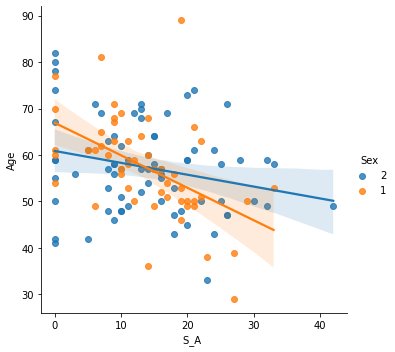

In [35]:
# age and SA 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.lmplot(x="S_A ", y="Age", hue="Sex", data=data_final_num_cat)
plt.show()

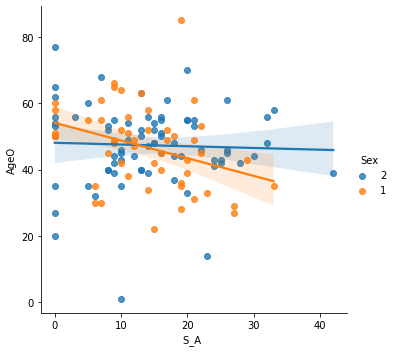

In [36]:
# onset age : how long have he/she been diabetic 
sns.lmplot(x="S_A ", y="AgeO", hue="Sex", data=data_final_num_cat)
plt.show()

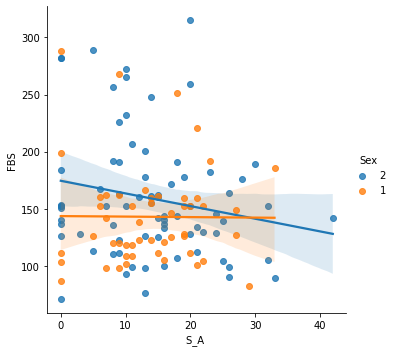

In [37]:
# correlation between severity of Peripheral neuropathy and Fasting Bloog Sugar with Gender 
# Sex = 1 for Male and 2 for female 
sns.lmplot(x="S_A ", y="FBS", hue="Sex", data=data_final_num_cat)
plt.show()

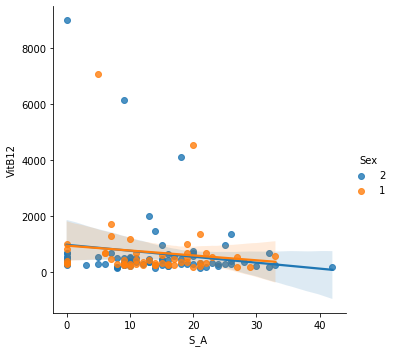

In [38]:
# correlation between S_A and VitB12 : inversely correlated 
sns.lmplot(x="S_A ", y="VitB12", hue="Sex", data=data_final_num_cat)
plt.show()

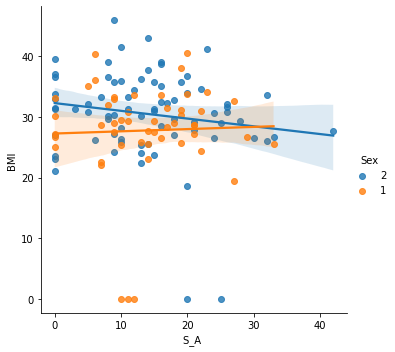

In [39]:
# correlation between S_A and VitB12 : No clear relationship 
# Sex = 1 for Male and 2 for female 
sns.lmplot(x="S_A ", y="BMI", hue="Sex", data=data_final_num_cat)
plt.show()

In [40]:
# correlation table 
corr_table = train_val_explor_final.corr()
corr_table

,index,Age,HR_L,BP_L_Sys,BP_L_Dias,HR_S,BP_S_Sys,BP_S_Dias,FBS,TSH,VitB12,HDL,LDL,Weight,Height,BMI,Working_hours,Driving_hours,AgeO,S_A
index,1.000000,0.209551,-0.057968,0.078732,-0.188127,-0.119710,-0.006866,-0.327703,0.112164,-0.108366,0.122716,-0.065750,-0.006967,-0.049877,-0.011031,0.158798,-0.160357,0.043525,0.084450,-0.128386
Age,0.209551,1.000000,-0.338839,0.074169,-0.379154,-0.409630,0.033316,-0.413553,-0.039987,-0.034362,0.126146,-0.039593,0.007753,-0.250372,-0.254066,-0.036190,-0.235480,-0.243535,0.629539,-0.337887
HR_L,-0.057968,-0.338839,1.000000,0.019513,0.311998,0.847814,0.090989,0.326578,0.313101,0.053601,-0.128258,0.041325,0.124385,-0.106365,-0.100223,-0.008777,0.023484,0.022353,-0.280436,0.147860
BP_L_Sys,0.078732,0.074169,0.019513,1.000000,0.513163,0.065969,0.754108,0.397085,0.057969,-0.004862,0.071666,-0.001588,0.123021,0.158408,-0.008961,0.163033,-0.000457,-0.067568,0.104760,-0.098416
BP_L_Dias,-0.188127,-0.379154,0.311998,0.513163,1.000000,0.366694,0.491329,0.767553,0.025836,-0.051744,-0.149327,-0.102706,0.122053,0.231657,0.099631,0.087950,0.118661,0.085711,-0.209542,0.170255
HR_S,-0.119710,-0.409630,0.847814,0.065969,0.366694,1.000000,0.045527,0.425970,0.336435,0.107349,-0.169755,0.106040,0.113274,-0.015559,-0.009863,-0.014678,0.025293,0.002392,-0.295015,0.173605
BP_S_Sys,-0.006866,0.033316,0.090989,0.754108,0.491329,0.045527,1.000000,0.570519,-0.018266,-0.038019,0.027429,-0.075818,0.162242,0.122869,-0.024372,0.109077,-0.042296,0.002105,0.138979,-0.059416
BP_S_Dias,-0.327703,-0.413553,0.326578,0.397085,0.767553,0.425970,0.570519,1.000000,0.018729,-0.018494,-0.162398,-0.052636,0.176119,0.162478,0.168270,-0.019684,0.177266,0.111334,-0.160297,0.229447
FBS,0.112164,-0.039987,0.313101,0.057969,0.025836,0.336435,-0.018266,0.018729,1.000000,0.031644,-0.068686,0.246885,0.054755,-0.154854,-0.148034,0.011660,0.052857,-0.026332,-0.180451,-0.130685
TSH,-0.108366,-0.034362,0.053601,-0.004862,-0.051744,0.107349,-0.038019,-0.018494,0.031644,1.000000,-0.066894,-0.040597,0.175218,-0.000547,-0.055173,0.036157,-0.041392,-0.058705,0.097404,-0.076306


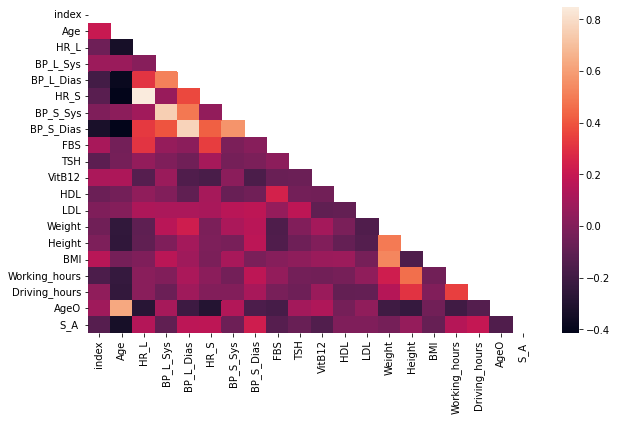

In [41]:
# plotting heatmap to show correlation matrix for numerical variables in X_Train_val 
import seaborn as sns 
import matplotlib.pyplot as plt 
mask = np.triu(np.ones_like(corr_table,dtype=bool))
plt.figure(figsize=(10,6))
sns.heatmap(corr_table,fmt='.2g',mask=mask,annot=False)
plt.show()

In [42]:
# plot TSNE - Dimensionality Reduction 
data_final_num_cat.columns

Index(['Age', 'HR_L', 'BP_L_Sys', 'BP_L_Dias', 'HR_S', 'BP_S_Sys', 'BP_S_Dias',
       'FBS', 'TSH', 'VitB12', 'HDL', 'LDL', 'Weight', 'Height', 'BMI',
       'Working_hours', 'Driving_hours', 'AgeO', 'S_A ', 'level_0', 'Sex',
       'Ohtn', 'DTRs', 'Rom', 'Diet', 'Smoker', 'Activity Level', 'Caffeine',
       'Family_stress', 'Hypertension', 'Renal_disease', 'Hyperlipidemia',
       'Hyperthyroidism', 'Hypothyroidism', 'Retinopathy', 'DM',
       'Modification', 'Pain', 'Diurnal', 'Coldness', 'Tingling', 'Alloydnia'],
      dtype='object')

In [43]:
# create new feature from exisiting one / convert target variable into categorical 
bins1 =[-1,0.1,20,np.inf]
labels1=('Severe_PN','Moderate_PN','No_PN')
data_final_num_cat['S_A_categories']=pd.cut(data_final_num_cat['S_A '],bins=bins,labels=labels) 
data_final_num_cat.head(3)

,Age,HR_L,BP_L_Sys,BP_L_Dias,HR_S,BP_S_Sys,BP_S_Dias,FBS,TSH,VitB12,...,Hypothyroidism,Retinopathy,DM,Modification,Pain,Diurnal,Coldness,Tingling,Alloydnia,S_A_categories
0,50.0,91.0,130.0,71.0,85.0,117.0,71.0,189.0,1.140,214.7,...,2,2,2,2,1,2,2,1,1,No_PN
1,61.0,75.0,155.0,77.0,74.0,153.0,77.0,113.0,0.873,280.9,...,2,2,2,1,2,1,1,1,1,Moderate_PN
2,51.0,88.0,163.0,99.0,95.0,151.0,94.0,125.0,2.230,250.3,...,2,1,2,2,1,1,2,2,2,Moderate_PN


In [44]:
# drop SA and SA categories and normalize X_explo 
from sklearn.preprocessing import StandardScaler 
scale = StandardScaler() 
data_final_num_cat1 = data_final_num_cat.drop('S_A ',axis=1)
x_explo = data_final_num_cat1.drop('S_A_categories',axis=1)
x_explo1 = scale.fit_transform(x_explo)
x_explo1 

array([[-0.71692536,  0.98961303, -0.52424491, ...,  0.06945784,
        -1.09071315, -1.9245009 ],
       [ 0.36232543, -0.32187413,  0.73692934, ..., -1.6947714 ,
        -1.09071315, -1.9245009 ],
       [-0.61881166,  0.74370919,  1.1405051 , ...,  0.06945784,
         0.91683134,  0.51961524],
       ...,
       [-0.81503907, -1.1415536 , -0.67558582, ..., -1.6947714 ,
        -1.09071315, -1.9245009 ],
       [ 1.34346251,  0.00599766,  0.93871722, ..., -1.6947714 ,
        -1.09071315,  0.51961524],
       [-1.01126649, -0.48581002,  1.79631571, ...,  0.06945784,
        -1.09071315,  0.51961524]])

In [45]:
# Map SA categories so it works for TSNE 
y_explo_cat=data_final_num_cat1['S_A_categories'].map({
    'Severe_PN':0,
    'Moderate_PN':1,
    'No_PN':2
}) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


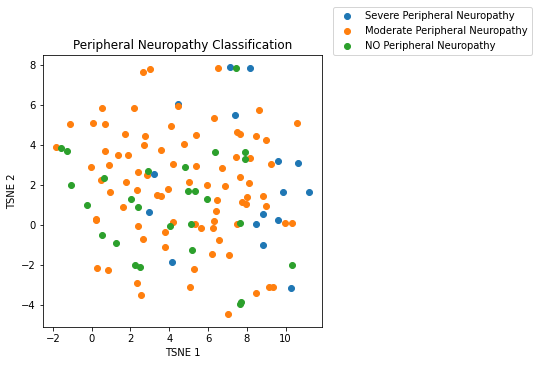

In [46]:
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt 
tsne = TSNE(n_components=2) 
reduced_features = tsne.fit_transform(x_explo1 )
plt.figure(figsize=(5,5)) 
reduced_features0 = reduced_features[y_explo_cat==0] 
reduced_features1 = reduced_features[y_explo_cat==1]
reduced_features2 = reduced_features[y_explo_cat==2]
plt.scatter(reduced_features0[:,0],reduced_features0[:,1],label='Severe Peripheral Neuropathy')
plt.scatter(reduced_features1[:,0],reduced_features1[:,1],label='Moderate Peripheral Neuropathy')
plt.scatter(reduced_features2[:,0],reduced_features2[:,1],label='NO Peripheral Neuropathy')
plt.title ('Peripheral Neuropathy Classification') 
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(loc=(1.04,1)) 
plt.show()


In [47]:
# let us convert X_train2 to dataframe for plotting purposes 
columns=list(X_train1.columns) 
data_Xtrain2=pd.DataFrame(x_explo,columns=columns) 
data_Xtrain2 = data_Xtrain2.reset_index() 
y_train3 = y_explo_cat.reset_index() 
X_t_plotting = pd.concat([data_Xtrain2,y_train3],axis=1)
X_t_plotting=X_t_plotting.drop('index',axis=1)
X_t_plotting.head(2)

,Age,Sex,HR_L,BP_L_Sys,BP_L_Dias,HR_S,BP_S_Sys,BP_S_Dias,Ohtn,DTRs,...,Retinopathy,DM,AgeO,Modification,Pain,Diurnal,Coldness,Tingling,Alloydnia,S_A_categories
0,50.0,2,91.0,130.0,71.0,85.0,117.0,71.0,2,0,...,2,2,44.0,2,1,2,2,1,1,2
1,61.0,2,75.0,155.0,77.0,74.0,153.0,77.0,2,2,...,2,2,60.0,1,2,1,1,1,1,1


In [48]:
# to be able to see the plotting in a scatter mix, let us convert the S_A_categories from categorical to integer 
X_t_plotting.S_A_categories= X_t_plotting.S_A_categories.astype(int)
X_t_plotting.S_A_categories.dtypes

dtype('int64')

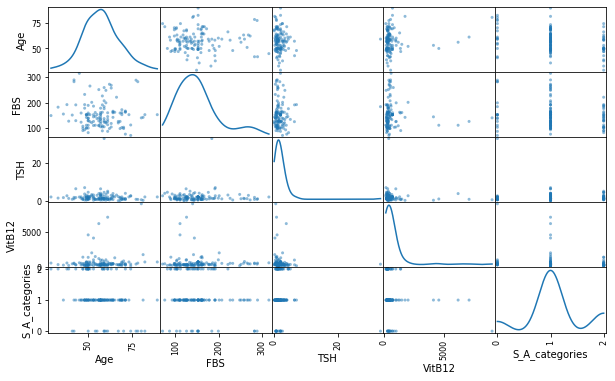

In [49]:
# one plot showing correlation of 4 features and target variable (S_A_categories)
from pandas.plotting import scatter_matrix 
attributes = ['Age','FBS','TSH','VitB12','S_A_categories']
scatter_matrix(X_t_plotting[attributes],figsize=(10,6),diagonal='kde')
plt.show()

In [ ]:
# RFECV 
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold 
estimator = RandomForestClassifier(random_state=0) 
selector = RFECV(estimator,step=1,cv=StratifiedKFold(7))
selector=selector.fit(x_explo,y_explo_cat) 
selector.ranking_
selector.support_

In [ ]:
features_ranking = selector.ranking_
features_ranking

In [ ]:
features_names=x_explo.columns

In [ ]:
import matplotlib.pyplot as plt
important_features = pd.DataFrame({'Features Names':features_names,'Features Ranking':features_ranking})
important_features = important_features.sort_values(by='Features Ranking',ascending=True)
important_features 

In [ ]:
# create dataframe with most important features according to RFECV 
X_train_valid_data_frame_RFEVC= data_final_num_cat1[['Age','Diet','DTRs','Coldness','AgeO','Driving_hours',
                                                     'Working_hours','BMI','Caffeine','Weight',
                                                     'Height','Height','HDL','VitB12','TSH','FBS','BP_S_Dias',
                                                     'BP_S_Sys','HR_S','BP_L_Dias','BP_L_Sys','HR_L','LDL','S_A_categories']]



#Data Preprocessing and Feature Engineering without RFECV 

In [ ]:
from sklearn.preprocessing import FunctionTransformer 
BP_L_Dias_ix,HR_S_ix,BP_S_Sys_ix,TSH_ix = [
                                                 list(X_train_val.columns).index(col) for col in ('BP_L_Dias','HR_S','BP_S_Sys','TSH')
]
def add_extra_features(X,add_BP_S_Sys=True):
  BP_L_Dias_TSH = X[:,BP_L_Dias_ix]/X[:,TSH_ix]
  HR_S_TSH=X[:,HR_S_ix]/X[:,TSH_ix]
  if add_BP_S_Sys:
    BP_S_Sys=X[:,BP_S_Sys_ix]/X[:,TSH_ix]
    return np.c_[X,BP_L_Dias_TSH,HR_S_TSH,BP_S_Sys]
  else:
    return np.c_[X,BP_L_Dias_TSH,HR_S_TSH]

In [ ]:
attr_adder = FunctionTransformer(add_extra_features,validate=False,kw_args={'add_BP_S_Sys':False})
train_extra_attribs=attr_adder.fit_transform(X_train_val.values)
train_extra_attribs=pd.DataFrame(
    train_extra_attribs,
    columns=list(X_train_val.columns)+['BP_L_Dias_TSH','HR_S_TSH'],
    index=X_train_val.index

)
print(train_extra_attribs.shape) 
print(train_extra_attribs.head(3))


In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer 
num_pipeline = Pipeline([
                         ('imputer',SimpleImputer(strategy='median')),
                         ('attribs_adder',FunctionTransformer(add_extra_features)),
                         ('std_scaler',StandardScaler()),
])

In [ ]:
train_num = X_train_val.select_dtypes(include=[np.number]) 
train_cat=X_train_val.select_dtypes(exclude=[np.number])

In [ ]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
num_attribs = list(train_num)
cat_attribs = list(train_cat)

full_pipeline = ColumnTransformer([
                                   ('num',num_pipeline,num_attribs ),
                                   ('cat',OneHotEncoder(handle_unknown = "ignore"),cat_attribs),
])
train_prepared = full_pipeline.fit_transform(X_train_val)
valid_prepared = full_pipeline.transform(X_val)

# Classification Models Without RFECV 

In [ ]:
# Basline Models - datafarme without RFECV 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
classifiers = [LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier()]
estimators = ['Logistic Regression','Random Forest Classifier','Decision Tree Classifier','SVC','KNN'] 
Accuracy=[]
Estimator=[]
Model =[]
for c,e in zip(classifiers,estimators):
  cvs=c.fit(train_prepared,y_train_val)
  y_predict1 = cvs.predict(valid_prepared)
  accuracy1 = accuracy_score(y_val,y_predict1)
  accuracy1=round(accuracy1,2) 
  Accuracy.append(accuracy1) 
  Estimator.append(e)
  Model.append(c)

print(Accuracy) 
print(Model)
dtc_cvs=pd.DataFrame({'Model':Model,'Estimator':Estimator,'Accuracy':Accuracy})
dtc_cvs=dtc_cvs.sort_values(by='Accuracy',ascending=False)
dtc_cvs=dtc_cvs.drop('Model',axis=1)
dtc_cvs


#DataFrame after applying RFECV

In [ ]:
RFECV_Data = data[['Age','VitB12','TSH','FBS','BP_S_Dias','BP_S_Sys','HR_S','BP_L_Dias','BP_L_Sys','HR_L','LDL','Diet','DTRs','Coldness','AgeO','Driving_hours', 'Working_hours','BMI','Caffeine','Weight','Height','HDL','S_A_categories']]
RFECV_Data.columns

In [ ]:
X_RFE =RFECV_Data.drop('S_A_categories',axis=1) 
X_RFE.columns

In [ ]:
y_RFE= RFECV_Data['S_A_categories']
y_RFE

In [ ]:
y_RFE_num=RFECV_Data['S_A_categories'].map({
    'Severe_PN':0,
    'Moderate_PN':1,
    'No_PN':2
}) 
y_RFE_num

In [ ]:
X_RFE['DTRs']=X_RFE['DTRs'].replace('3','2')
X_RFE['DTRs']=X_RFE['DTRs'].astype(str)


In [ ]:
from sklearn.model_selection import train_test_split 
X_train_r,X_test_r,y_train_r,y_test_R = train_test_split(X_RFE,y_RFE_num,test_size=0.4,stratify=y_RFE_num)
X_train_rfe,X_val_rfe,y_train_rfe,y_val_rfe=train_test_split(X_train_r,y_train_r,test_size=0.4,stratify=y_train_r)

In [ ]:
X_train_rfe.head(3)

In [ ]:
from sklearn.preprocessing import FunctionTransformer 
BP_L_Dias_ix,HR_S_ix,BP_S_Sys_ix,TSH_ix = [
                                                 list(X_train_rfe.columns).index(col) for col in ('BP_L_Dias','HR_S','BP_S_Sys','TSH')
]
def add_extra_features1(X,add_BP_S_Sys=True):
  BP_L_Dias_TSH1 = X[:,BP_L_Dias_ix]/X[:,TSH_ix]
  HR_S_TSH1=X[:,HR_S_ix]/X[:,TSH_ix]
  if add_BP_S_Sys:
    BP_S_Sys1=X[:,BP_S_Sys_ix]/X[:,TSH_ix]
    return np.c_[X,BP_L_Dias_TSH1,HR_S_TSH1,BP_S_Sys1]
  else:
    return np.c_[X,BP_L_Dias_TSH1,HR_S_TSH1]

In [ ]:
attr_adder1 = FunctionTransformer(add_extra_features1,validate=False,kw_args={'add_BP_S_Sys':False})
train_extra_attribs1=attr_adder1.fit_transform(X_train_rfe.values)
train_extra_attribs1=pd.DataFrame(
    train_extra_attribs1,
    columns=list(X_train_rfe.columns)+['BP_L_Dias_TSH1','HR_S_TSH1'],
    index=X_train_rfe.index

)
print(train_extra_attribs1.shape) 
print(train_extra_attribs1.head(3))


In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer 
num_pipeline1 = Pipeline([
                         ('imputer',SimpleImputer(strategy='median')),
                         ('attribs_adder',FunctionTransformer(add_extra_features1)),
                         ('std_scaler',StandardScaler()),
])

In [ ]:
train_num1 = X_train_rfe.select_dtypes(include=[np.number]) 
train_cat1=X_train_rfe.select_dtypes(exclude=[np.number])

In [ ]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
num_attribs1 = list(train_num1)
cat_attribs1 = list(train_cat1)

full_pipeline1 = ColumnTransformer([
                                   ('num',num_pipeline1,num_attribs1 ),
                                   ('cat',OneHotEncoder(handle_unknown = "ignore"),cat_attribs1),
])
train_prepared1 = full_pipeline1.fit_transform(X_train_rfe)
valid_prepared1 = full_pipeline1.transform(X_val_rfe)

# Classification Models With RFECV 

In [ ]:
# Basline Model comparison - datafarme with RFECV 
classifiers_rfe = [LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier()]
estimators_rfe = ['Logistic Regression','Random Forest Classifier','Decision Tree Classifier','SVC','KNN'] 
Accuracy_rfe=[]
Estimator_rfe=[]
Model_rfe =[]
for c,e in zip(classifiers_rfe,estimators_rfe):
  cvs_rfe=c.fit(train_prepared1,y_train_rfe)
  y_predict_rfe = cvs_rfe.predict(valid_prepared1)
  accuracy_r = accuracy_score(y_val_rfe,y_predict_rfe)
  accuracy_r=round(accuracy_r,2) 
  Accuracy_rfe.append(accuracy_r) 
  Estimator_rfe.append(e)
  Model_rfe.append(c)

print(Accuracy_rfe) 
print(Model_rfe)
dtc_cvs1=pd.DataFrame({'Model':Model_rfe,'Estimator':Estimator_rfe,'Accuracy':Accuracy_rfe})
dtc_cvs1=dtc_cvs1.sort_values(by='Accuracy',ascending=False)
dtc_cvs1=dtc_cvs1.drop('Model',axis=1)
dtc_cvs1

# Comparison : Baseline Models With and Without RFECV 

In [ ]:
# Model with RFECV 
dtc_cvs1= dtc_cvs1.reset_index()
dtc_cvs1

In [ ]:
# Model without RFECV
dtc_cvs= dtc_cvs.reset_index()
dtc_cvs

In [ ]:
# Merging the two dataset for comparison 
baseline_models=dtc_cvs.merge(dtc_cvs1,on='index',how='outer')
baseline_models = baseline_models.drop(['index','Estimator_y'],axis=1)
baseline_models = baseline_models.rename({'Estimator_x':'Classifier','Accuracy_x':'Accuracy_Without_RFECV','Accuracy_y':'Accuracy_with_RFECV'},axis=1)
baseline_models

#Parameter Optimization for Models Without RFECV

#SVC

In [ ]:
# SVC parameter optimization on dataframe without RFECV since accuracy are higher in baseline models 
from sklearn.metrics import accuracy_score 
cost=[0.5,1,1.5,2]
kernel=['linear','poly','rbf','sigmoid']
gamma=['scale','auto']
Cos=[]
Kern=[]
Gam =[]
Accurate_valid=[]
Accurate_train=[]
for c in cost:
  for k in kernel:
    for g in gamma:
      svc=SVC(C=c,kernel=k,gamma=g).fit(train_prepared,y_train_val)
      predict = svc.predict(valid_prepared) 
      predict_train=svc.predict(train_prepared)
      accuracy_valid = accuracy_score(predict,y_val) 
      accuracy_train=accuracy_score(predict_train,y_train_val)
      accuracy_valid = round(accuracy_valid,2)
      Accurate_valid.append(accuracy_valid)
      Accurate_train.append(accuracy_train) 
      Cos.append(c) 
      Kern.append(k) 
      Gam.append(g)
print(Accurate_valid)
print(Cos)
print(Kern)
print(Gam)


In [ ]:
SVC_dataframe=pd.DataFrame({'Cost':Cos,'Kernel':Kern,'Gamma':Gam,'Accuracy_valid':Accurate_valid,'Accuracy_train':Accurate_train})
SVC_dataframe=SVC_dataframe.sort_values(by='Accuracy_train',ascending=False)
SVC_dataframe

In [ ]:
# let us plot overfitting with SVC
from matplotlib import pyplot 
cost=[i for i in range (1,10,1)]
train_scores, val_scores = list(), list()
for i in cost:
	# configure the model
	model = SVC(C=i)
	# fit model on the training dataset
	model.fit(train_prepared, y_train_val)
	# evaluate on the train dataset
	train_yhat = model.predict(train_prepared)
	train_acc = accuracy_score(y_train_val, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the valid dataset
	val_yhat = model.predict(valid_prepared )
	val_acc = accuracy_score(y_val, val_yhat)
	val_scores.append(val_acc)
	# summarize progress
	# print('>%d, train: %.3f, val: %.3f' % (i, train_acc, val_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(cost, train_scores, '-o', label='Train')
pyplot.plot(cost, val_scores, '-o', label='Val')
pyplot.xlabel('Cost') 
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

#Random Forest Classifier

In [ ]:
# let us take RandomForestClassifier and perform hyper-parameter tuning 
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier()
n_estimators=[10,20,30,40,50] 
criterion =['gini','entropy']
min_samples_split=[2,3,4,5] 
Estimators = [] 
Criter = [] 
Min_Samples =[] 
Accurate_valid =[] 
Accurate_train=[]
for n in n_estimators:
  for c in criterion:
    for m in min_samples_split:
      rfc = RandomForestClassifier(n_estimators=n,criterion=c,min_samples_split=m).fit(train_prepared,y_train_val) 
      y_predict_train=rfc.predict(train_prepared)
      y_predict_valid = rfc.predict(valid_prepared) 
      accur_valid = accuracy_score(y_predict_valid,y_val) 
      accur_train=accuracy_score(y_predict_train,y_train_val)
      Accurate_valid.append(accur_valid)
      Accurate_train.append(accur_train) 
      Estimators.append(n) 
      Criter.append(c) 
      Min_Samples.append(m) 
print(Estimators)
print(Min_Samples)
print(Criter)
print(Accurate_valid)

In [ ]:
random_forest_dataframe=pd.DataFrame({'Numb_of_Estimators':Estimators,'Criterion':Criter,'Min_Samples':Min_Samples,'Accuracy_valid':Accurate_valid,'Accuracy_train':Accurate_train})
random_forest_dataframe=random_forest_dataframe.sort_values(by='Accuracy_valid',ascending=False)
random_forest_dataframe

In [ ]:
# let us plot overfitting with RFc
from matplotlib import pyplot 
n_estimators=[i for i in range (1,70,10)]
train_scores, val_scores = list(), list()
for i in n_estimators:
	# configure the model
	model = RandomForestClassifier(n_estimators=i)
	# fit model on the training dataset
	model.fit(train_prepared, y_train_val)
	# evaluate on the train dataset
	train_yhat = model.predict(train_prepared)
	train_acc = accuracy_score(y_train_val, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	val_yhat = model.predict(valid_prepared )
	val_acc = accuracy_score(y_val, val_yhat)
	val_scores.append(val_acc)
	# summarize progress
	print('>%d, train: %.3f, val: %.3f' % (i, train_acc, val_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(n_estimators, train_scores, '-o', label='Train')
pyplot.plot(n_estimators, val_scores, '-o', label='Val')
pyplot.xlabel('Number of Estimators') 
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

#Neural Network with Multi-Layer Perceptron 

In [ ]:
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix
import numpy as np 

In [ ]:
MLPClassifier?

In [ ]:
from sklearn.metrics import accuracy_score
hidden_layer_sizes =[2,4,6] 
activation=['logistic','relu','tanh'] 
solver = ['sgd','adam']
accuracy=[]
parameters = []
for h in hidden_layer_sizes:
  for a in activation:
    for s in solver:
      mlp=MLPClassifier(hidden_layer_sizes=(h),activation=a,solver=s) 
      mlp.fit(train_prepared,y_train_val)  
      y_predict = mlp.predict(valid_prepared) 
      acc_score = round(accuracy_score(y_val,y_predict),2)
      parameters.append("Hidden_Layers:{}, Activation:{}, Solver:{}".format(h,a,s))
      accuracy.append(acc_score)
print(accuracy)

In [ ]:
mlp_dataframe = pd.DataFrame({'Parameters':parameters,'Accuracy':accuracy}) 
mlp_dataframe =mlp_dataframe.sort_values(by='Accuracy',ascending=False)
mlp_dataframe

#Deep Neural Network with Keras & Tensorflow 

In [ ]:
# Deep Neural Network using tensorflow 
import tensorflow as tf 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.utils import plot_model 
%load_ext tensorboard 

In [ ]:
train_prepared.shape

In [ ]:
model = Sequential()
model.add(Dense(4,activation='relu',input_dim=95))
model.add(Dense(1,activation='softmax'))

In [ ]:
model.summary()

In [ ]:
plot_model(model,show_shapes=True,show_layer_names=True)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# tensorflow accepts arrays , we will convert our target variable to array 
y_train_val_nump = np.asarray(y_train_val)
y_val_nump = np.asarray(y_val)

In [ ]:
# epochs > 90 is rendering same accuracy. 
model.fit(train_prepared,y_train_val_nump,epochs=90)

In [ ]:
model.evaluate(valid_prepared,y_val_nump)

#Accuracy Measure with ROC & AUC 

# ROC - AUC on Validation Dataset 

In [ ]:
# Plotting confusion matrix 
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
rfc = RandomForestClassifier(n_estimators=25,max_features=7,min_samples_split=2).fit(train_prepared,y_train_val) 
plot_confusion_matrix(rfc, valid_prepared, y_val)  
plt.show()

In [ ]:
# Micro- and macro-averages (for whatever metric) will compute slightly different things, 
# and thus their interpretation differs. A macro-average will compute the metric independently
# for each class and then take the average (hence treating all classes equally), 
# whereas a micro-average will aggregate the contributions of all classes to compute the average metric. 
# In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance
from sklearn.metrics import confusion_matrix 
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from sklearn.metrics import roc_auc_score,auc

In [ ]:
# to compare our work to published papers, we will get accuracy using onevsrest and onevsone 
# we will use SVC since it was used in published papers. 
from sklearn.svm import SVC

model = OneVsRestClassifier(
    SVC())
model.fit(train_prepared, y_train_val)
# make predictions
yhat = model.predict(valid_prepared)
accuracy = accuracy_score(y_val,yhat)
accuracy = round(accuracy,2)
accuracy

In [ ]:
# to compare our work to published papers, we will get accuracy using onevsrest and onevs one 
model1 = OneVsOneClassifier(
    SVC())

model1.fit(train_prepared, y_train_val)
yhat = model1.predict(valid_prepared)
accuracy1 = accuracy_score(y_val,yhat)
accuracy1 = round(accuracy1,2)
accuracy1

In [ ]:
y_val_bin=label_binarize(y_val,classes=[0,1,2]) 
n_classes=y_val_bin.shape[1]
y_val_bin

In [ ]:
# learn to predict each class against the other , i tried SVC but it is taking endless time
classifier = OneVsRestClassifier(
    RandomForestClassifier(n_estimators=25,max_features=7,min_samples_split=2) 
)
y_score = classifier.fit(train_prepared,y_train_val).predict_proba(valid_prepared)
y_score 

In [ ]:
# let us try to loop over some thresholds for class 0 "Severe peripheral neuropathy"
y_predict_th3 = np.where(classifier.predict_proba(valid_prepared)[:,0]>0.3,1,0)
y_predict_th3

In [ ]:
# compute ROC curve and ROC area for each class 
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
# plot of a ROC for a specific class - class 2 
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()


In [ ]:
#plot ROC curves for the multiclass problem 
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()
# A macro-average will compute the metric independently for each class and then take the average hence treating all classes equally, 
# whereas a micro-average will aggregate the contributions of all classes to compute the average metric.

# ROC - AUC on Test Dataset 

> Indented block



In [ ]:
# transforming train and validation in one training dataset 
X_train_prepared = full_pipeline.transform(X_train)
X_train_prepared

In [ ]:
X_test_prepared = full_pipeline.transform(X_test)
X_test_prepared 

In [ ]:
y_test_bin=label_binarize(y_test,classes=[0,1,2]) 
n_classes1=y_test_bin.shape[1]
y_test_bin

In [ ]:
# learn to predict each class against the other , i tried SVC but it is taking endless time
classifier1 = OneVsRestClassifier(
    RandomForestClassifier(n_estimators=25,max_features=7,min_samples_split=2) 
)
y_score1 = classifier1.fit(X_train_prepared,y_train).predict_proba(X_test_prepared )
y_score1

In [ ]:
# compute ROC curve and ROC area for each class 
fpr1 = dict()
tpr1 = dict()
roc_auc1 = dict()
for i in range(n_classes1):
    fpr1[i], tpr1[i], _ = roc_curve(y_test_bin[:, i], y_score1[:, i])
    roc_auc1[i] = auc(fpr1[i], tpr1[i])

# Compute micro-average ROC curve and ROC area
fpr1["micro"], tpr1["micro"], _ = roc_curve(y_test_bin.ravel(), y_score1.ravel())
roc_auc1["micro"] = auc(fpr1["micro"], tpr1["micro"])

In [ ]:
# plot of a ROC for a specific class - class 2 
plt.figure()
lw = 2
plt.plot(
    fpr1[2],
    tpr1[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc1[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()


In [ ]:
#plot ROC curves for the multiclass problem 
# First aggregate all false positive rates
all_fpr1 = np.unique(np.concatenate([fpr1[i] for i in range(n_classes1)]))

# Then interpolate all ROC curves at this points
mean_tpr1 = np.zeros_like(all_fpr1)
for i in range(n_classes1):
    mean_tpr1 += np.interp(all_fpr1, fpr1[i], tpr1[i])

# Finally average it and compute AUC
mean_tpr1 /= n_classes1

fpr1["macro"] = all_fpr1
tpr1["macro"] = mean_tpr1
roc_auc1["macro"] = auc(fpr1["macro"], tpr1["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr1["micro"],
    tpr1["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc1["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr1["macro"],
    tpr1["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc1["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes1), colors):
    plt.plot(
        fpr1[i],
        tpr1[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc1[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()
# A macro-average will compute the metric independently for each class and then take the average hence treating all classes equally, 
# whereas a micro-average will aggregate the contributions of all classes to compute the average metric.

#Addressing Imbalanced Data with SMOTE 

In [ ]:
pip install imbalanced-learn

In [ ]:
import imblearn
print(imblearn.__version__)

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.preprocessing import LabelEncoder 


In [ ]:
y_cat.value_counts()

In [ ]:
# plot the imbalanced data 
# 0= severe, 1= moderate, 2 = no pN 
df_smote = data
y_smote = LabelEncoder().fit_transform(y_cat) 
counter = Counter(y_smote) 
for k,v in counter.items():
  per = v / len(y_smote)*100 
  print('Class =%d, n=%d (%.3f%%)'%(k,v,per))

#plot the distribution 
pyplot.bar(counter.keys(),counter.values())
pyplot.title('Class Breakdown before SMOTE')
pyplot.show()

In [ ]:
data.columns

In [ ]:
data.dtypes

In [ ]:
# replace NaN of numerical features with Mean 
data_numeric = data.select_dtypes(include=[np.number])
data_numeric = data_numeric.fillna(data_numeric.mean())
data_numeric=data_numeric.reset_index()
data_numeric.head(3)

In [ ]:
# replace NaN of categorical features with Mode or most frequent value of each column 
data_categorical = data.select_dtypes(exclude=[np.number])
data_categorical = data_categorical.apply(lambda x: x.fillna(x.value_counts().index[0]))
data_categorical=data_categorical.reset_index()
data_categorical.head(3)

In [ ]:
data_final = data_numeric.merge(data_categorical,on='index',how='outer')
data_final=data_final.drop(['index','S_A '],axis=1)
data_final.head(2)

In [ ]:
y_cat1=data_final['S_A_categories'].map({
    'Severe_PN':0,
    'Moderate_PN':1,
    'No_PN':2
}) 


In [ ]:
# Oversample minority classes with SMOTE 
df_smote1 = data_final
data_smote = df_smote1.values
X_smote1,y_smote1 = data_smote[:,:-1],data_smote[:,-1] 
y_smote1 = LabelEncoder().fit_transform(y_cat1) 
#transform teh dataset 
oversample=SMOTE() 
X_smote1,y_smote1=oversample.fit_resample(X_smote1,y_smote1)
#summarize distribution
counter1 = Counter(y_smote1) 
for k,v in counter1.items():
  per = v / len(y_smote1)*100 
  print('Class =%d, n=%d (%.3f%%)'%(k,v,per))

#plot the distribution 
pyplot.bar(counter1.keys(),counter1.values())
pyplot.title('Class Break Down after SMOTE')
pyplot.show()

#Accuracy with SMOTE

In [ ]:
# let us split our data after SMOTE
X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X_smote1,y_smote1,test_size=0.3,stratify=y_smote1,shuffle=True,random_state=0) 
X_train1_smote,X_valid1_smote,y_train1_smote,y_valid1_smote=train_test_split(X_train_smote,y_train_smote,test_size=0.3,stratify=y_train_smote,shuffle=True,random_state=0)
classifiers_smote = [LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier()] 
Accuracy_smote = []
estimator_smote = []
for c in classifiers_smote:
  m = c.fit(X_train1_smote,y_train1_smote)
  pred_smote=m.predict(X_valid1_smote)
  acc_smote = accuracy_score(y_valid1_smote,pred_smote)
  acc_smote = round(acc_smote,2)
  Accuracy_smote.append(acc_smote)
  estimator_smote.append(c)

data_frame_smote=pd.DataFrame({'Model':estimator_smote,'Accuracy':Accuracy_smote})
data_frame_smote=data_frame_smote.sort_values(by='Accuracy',ascending=False)
print(data_frame_smote)


In [ ]:
data_frame_smote=data_frame_smote.reset_index()
data_frame_smote

In [ ]:
# baseline model without rfecv
dtc_cvs

In [ ]:
# baseline model with rfecv 
dtc_cvs1

In [ ]:
# join dataframes with rfecv & withour rfex 
data_b=dtc_cvs1.merge(dtc_cvs,on='index',how='outer')
data_b=data_b.drop('Estimator_y',axis=1)
data_b = data_b.rename({'Estimator_x':'Model','Accuracy_x':'Accuracy_WithRFECV','Accuracy_y':'Accuracy_WithoutRFECV'},axis=1)
data_b

In [ ]:
# join all dataframes for comparison
data_f=data_b.merge(data_frame_smote,on='index',how='outer')
data_f=data_f.drop(['Model_y','index'],axis=1)
data_f = data_f.rename({'Model_x':'Model','Accuracy':'Accuracy_SMOTE'},axis=1)
data_f= data_f.sort_values(by='Accuracy_SMOTE',ascending=False)
data_f

In [ ]:
# Random Forest Classifier with class weight to balanced the dataset 
rfc_sk = RandomForestClassifier ( class_weight='balanced' )
rfc_sk.fit ( train_prepared, y_train_val )
y_predict_val = rfc_sk.predict ( valid_prepared )
accuracy_vla = accuracy_score ( y_val, y_predict_val )
accuracy_vla = round ( accuracy_vla, 2)
accuracy_vla 

In [ ]:
# let us try to optimize Random Forest with SMOTE 
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier()
n_estimators=[10,20,30,40,50] 
criterion =['gini','entropy']
min_samples_split=[2,3,4,5] 
Estimators = [] 
Criter = [] 
Min_Samples =[] 
Accurate_valid =[] 
for n in n_estimators:
  for c in criterion:
    for m in min_samples_split:
      rfc = RandomForestClassifier(n_estimators=n,criterion=c,min_samples_split=m).fit(X_train1_smote,y_train1_smote) 
      y_predict_valid = rfc.predict(X_valid1_smote) 
      accur_valid = accuracy_score(y_predict_valid,y_valid1_smote) 
      Accurate_valid.append(accur_valid)
      Estimators.append(n) 
      Criter.append(c) 
      Min_Samples.append(m) 
print(Estimators)
print(Min_Samples)
print(Criter)
print(Accurate_valid)

In [ ]:
rfc_smote_opt=pd.DataFrame({'Numb_Estimators':Estimators,'Min_Samples_split':Min_Samples,'Criteria':Criter,'Accuracy_valid':Accurate_valid})
rfc_smote_opt = rfc_smote_opt.sort_values(by='Accuracy_valid',ascending=False)
rfc_smote_opt =rfc_smote_opt.reset_index()
rfc_smote_opt.head(3)

In [ ]:
# let us now train on full training dataset and test on the final dataset 
rfc_test= RandomForestClassifier(n_estimators=40,criterion='gini',min_samples_split=2)
rfc_test.fit(X_train_smote,y_train_smote)
predict_rfc = rfc_test.predict(X_test_smote)
accuracy_test = accuracy_score(y_test_smote,predict_rfc)
accuracy_test = round(accuracy_test,2)
print(accuracy_test)

In [ ]:
# let us split our data after SMOTE
X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X_smote1,y_smote1,test_size=0.3,stratify=y_smote1,shuffle=True,random_state=0) 

In [ ]:
y_test_bin1=label_binarize(y_test_smote ,classes=[0,1,2]) 
n_classes2=y_test_bin1.shape[1]
y_test_bin1

In [ ]:
# learn to predict each class against the other , i tried SVC but it is taking endless time
classifier10 = OneVsRestClassifier(
    RandomForestClassifier(n_estimators=25,max_features=7,min_samples_split=2) 
)
y_score10 = classifier10.fit(X_train_smote,y_train_smote).predict_proba(X_test_smote)
y_score10

In [ ]:
# compute ROC curve and ROC area for each class 
fpr10 = dict()
tpr10 = dict()
roc_auc10 = dict()
for i in range(n_classes2):
    fpr10[i], tpr10[i], _ = roc_curve(y_test_bin1[:, i], y_score10[:, i])
    roc_auc10[i] = auc(fpr10[i], tpr10[i])

# Compute micro-average ROC curve and ROC area
fpr10["micro"], tpr10["micro"], _ = roc_curve(y_test_bin1.ravel(), y_score10.ravel())
roc_auc10["micro"] = auc(fpr10["micro"], tpr10["micro"])

In [ ]:
#plot ROC curves for the multiclass problem 
# First aggregate all false positive rates
all_fpr10 = np.unique(np.concatenate([fpr10[i] for i in range(n_classes2)]))

# Then interpolate all ROC curves at this points
mean_tpr10 = np.zeros_like(all_fpr10)
for i in range(n_classes2):
    mean_tpr10 += np.interp(all_fpr10, fpr10[i], tpr10[i])

# Finally average it and compute AUC
mean_tpr10 /= n_classes2

fpr10["macro"] = all_fpr10
tpr10["macro"] = mean_tpr10
roc_auc10["macro"] = auc(fpr10["macro"], tpr10["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr10["micro"],
    tpr10["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc10["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr10["macro"],
    tpr10["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc10["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes2), colors):
    plt.plot(
        fpr1[i],
        tpr1[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc1[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - AUC on Balanced Dataset - SMOTE")
plt.legend(loc="lower right")
plt.show()
# A macro-average will compute the metric independently for each class and then take the average hence treating all classes equally, 
# whereas a micro-average will aggregate the contributions of all classes to compute the average metric.